In [14]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_input_irv2
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [13]:
# VGG19
class FeatureExtractor:
    def __init__(self):
        base_model = VGG19(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)

    def extract(self, img):
      # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature 

In [9]:
class FeatureExtractor_Irv2:
    def __init__(self):
        base_model = InceptionResNetV2(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)

    def extract(self, img):
      # Resize the image
        img = img.resize((299, 299))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input_irv2(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature

In [18]:
features = []
img_paths = []
files = []

# 파일 경로 설정
fe = FeatureExtractor()
# Save Image Feature Vector with Database Images
for i in range(30000,40000):
    if i%100 == 0:
        print(i)
    try:
        path = 'C:/Users/NT550/Desktop/DL_project/image'
        os.chdir(path)
        files = os.listdir(path)
        image_path = 'C:/Users/NT550/Desktop/DL_project/image/{}'.format(files[i]) # 파일 속 이미지 파일 이름
        img_paths.append(image_path)
        
        # Extract Features
        feature = fe.extract(img=Image.open(image_path))
            
        features.append(feature)
        # Save the Numpy array (.npy) on designated path
     # Feature를 저장할 폴더 경로 설정(폴더 생성 후 경로 설정)
        feature_path = "C:/Users/NT550/Desktop/DL_project/features/features" + files[i].strip('.jpg') + ".npy"
        np.save(feature_path, feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)

30000
1/1 [==============================] - 0s 227ms/step
30100
1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 222ms/step
30200
1/1 [==============================] - 0s 222ms/step
30300
1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 188ms/step
30400
1/1 [==============================] - 0s 229ms/step


1/1 [==============================] - 0s 213ms/step
30500
1/1 [==============================] - 0s 201ms/step
30600
1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 206ms/step
30700
1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 197ms/step
30800
1/1 [==============================] - 0s 173ms/step
30900
1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 190ms/step
31000
1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 174ms/step
31100
1/1 [==============================] - 0s 207ms/step
31200
1/1 [==============================] - 0s 197ms/step


1/1 [==============================] - 0s 193ms/step
31300
1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 239ms/step
31400
1/1 [==============================] - 0s 249ms/step
31500
1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 196ms/step
31600
1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 186ms/step
31700
1/1 [==============================] - 0s 196ms/step
31800
1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 186ms/step
31900
1/1 [==============================] - 0s 182ms/step
32000
1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 194ms/step
32100
1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 186ms/step
32200
1/1 [==============================] - 0s 192ms/step
32300
1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 0s 191ms/step
32400
1/1 [==============================] - 0s 255ms/step


1/1 [==============================] - 0s 216ms/step
32500
1/1 [==============================] - 0s 207ms/step
32600
1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 213ms/step
32700
1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 219ms/step
32800
1/1 [==============================] - 0s 231ms/step
32900
1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 245ms/step
33000
1/1 [==============================] - 0s 272ms/step


1/1 [==============================] - 0s 260ms/step
33100
1/1 [==============================] - 0s 267ms/step
33200
1/1 [==============================] - 0s 273ms/step


1/1 [==============================] - 0s 397ms/step
33300
1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 300ms/step
33400
1/1 [==============================] - 0s 330ms/step
33500
1/1 [==============================] - 0s 281ms/step


1/1 [==============================] - 0s 354ms/step
33600
1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 301ms/step
33700
1/1 [==============================] - 0s 324ms/step
33800
1/1 [==============================] - 0s 411ms/step


1/1 [==============================] - 0s 363ms/step
33900
1/1 [==============================] - 0s 333ms/step
34000
1/1 [==============================] - 0s 342ms/step


1/1 [==============================] - 0s 421ms/step
34100
1/1 [==============================] - 0s 344ms/step


1/1 [==============================] - 0s 322ms/step
34200
1/1 [==============================] - 0s 333ms/step
34300
1/1 [==============================] - 0s 328ms/step


1/1 [==============================] - 0s 397ms/step
34400
1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 404ms/step
34500
1/1 [==============================] - 0s 432ms/step
34600
1/1 [==============================] - 0s 442ms/step


1/1 [==============================] - 0s 421ms/step
34700
1/1 [==============================] - 0s 402ms/step


1/1 [==============================] - 0s 441ms/step
34800
1/1 [==============================] - 0s 454ms/step
34900
1/1 [==============================] - 0s 433ms/step


1/1 [==============================] - 0s 380ms/step
35000
1/1 [==============================] - 0s 468ms/step


1/1 [==============================] - 0s 445ms/step
35100
1/1 [==============================] - 0s 471ms/step
35200
1/1 [==============================] - 0s 455ms/step


1/1 [==============================] - 0s 459ms/step
35300
1/1 [==============================] - 0s 474ms/step


1/1 [==============================] - 1s 507ms/step
35400
1/1 [==============================] - 1s 548ms/step
35500
1/1 [==============================] - 1s 512ms/step


1/1 [==============================] - 1s 503ms/step
35600
1/1 [==============================] - 1s 501ms/step


1/1 [==============================] - 1s 513ms/step
35700
1/1 [==============================] - 1s 529ms/step
35800
1/1 [==============================] - 0s 493ms/step


1/1 [==============================] - 0s 489ms/step
35900
1/1 [==============================] - 1s 510ms/step
36000
1/1 [==============================] - 0s 471ms/step


1/1 [==============================] - 1s 509ms/step
36100
1/1 [==============================] - 1s 517ms/step


1/1 [==============================] - 1s 570ms/step
36200
1/1 [==============================] - 1s 724ms/step
36300
1/1 [==============================] - 1s 621ms/step


1/1 [==============================] - 1s 571ms/step
36400
1/1 [==============================] - 1s 533ms/step


1/1 [==============================] - 1s 568ms/step
36500
1/1 [==============================] - 1s 591ms/step
36600
1/1 [==============================] - 1s 636ms/step


1/1 [==============================] - 1s 734ms/step
36700
1/1 [==============================] - 1s 767ms/step


1/1 [==============================] - 1s 695ms/step
36800
1/1 [==============================] - 1s 748ms/step
36900
1/1 [==============================] - 1s 831ms/step


1/1 [==============================] - 1s 779ms/step
37000
1/1 [==============================] - 1s 630ms/step


1/1 [==============================] - 1s 580ms/step
37100
1/1 [==============================] - 1s 690ms/step
37200
1/1 [==============================] - 1s 718ms/step


1/1 [==============================] - 1s 634ms/step
37300
1/1 [==============================] - 1s 785ms/step


1/1 [==============================] - 1s 687ms/step
37400
1/1 [==============================] - 1s 664ms/step
37500
1/1 [==============================] - 1s 755ms/step


1/1 [==============================] - 1s 718ms/step
37600
1/1 [==============================] - 1s 836ms/step
37700


1/1 [==============================] - 1s 766ms/step
37800
1/1 [==============================] - 1s 786ms/step


1/1 [==============================] - 1s 803ms/step
37900
1/1 [==============================] - 1s 810ms/step
38000
1/1 [==============================] - 1s 959ms/step


1/1 [==============================] - 1s 955ms/step
38100
1/1 [==============================] - 1s 873ms/step


1/1 [==============================] - 1s 948ms/step
38200
1/1 [==============================] - 1s 833ms/step
38300
1/1 [==============================] - 1s 789ms/step


1/1 [==============================] - 1s 857ms/step
38400
1/1 [==============================] - 1s 916ms/step


1/1 [==============================] - 1s 929ms/step
38500
1/1 [==============================] - 1s 1s/step
38600
1/1 [==============================] - 1s 978ms/step


1/1 [==============================] - 1s 886ms/step
38700
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
38800
1/1 [==============================] - 1s 1s/step
38900
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
39000
1/1 [==============================] - 1s 1s/step
39100
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
39200
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
39300
1/1 [==============================] - 1s 1s/step
39400
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
39500
1/1 [==============================] - 1s 1s/step
39600
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
39700
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
39800
1/1 [==============================] - 1s 1s/step
39900
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


In [15]:
features = []
img_paths = []
files = []

# 파일 경로 설정
fe = FeatureExtractor()
# Save Image Feature Vector with Database Images
for i in range(9990,10010):
    if i%100 == 0:
        print(i)
    try:
        path = 'C:/Users/NT550/Desktop/DL_project/image'
        os.chdir(path)
        files = os.listdir(path)
        image_path = 'C:/Users/NT550/Desktop/DL_project/image/{}'.format(files[i]) # 파일 속 이미지 파일 이름
        img_paths.append(image_path)
        
        # Extract Features
        feature = fe.extract(img=Image.open(image_path))
            
        features.append(feature)
        # Save the Numpy array (.npy) on designated path
     # Feature를 저장할 폴더 경로 설정(폴더 생성 후 경로 설정)
        feature_path = "C:/Users/NT550/Desktop/DL_project/features/features" + files[i].strip('.jpg') + ".npy"
        np.save(feature_path, feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)

1/1 [==============================] - 0s 174ms/step
10000
1/1 [==============================] - 0s 158ms/step


In [2]:
import os
features_vgg19 = []
file_list = os.listdir('C:/Users/NT550/Desktop/DL_project/features_VGG19')
for file in file_list[:10000]:
    feature = np.load(f'C:/Users/NT550/Desktop/DL_project/features_VGG19/{file}')
    features_vgg19.append(feature)

In [3]:
import os
features_irv2 = []
file_list_irv2 = os.listdir('C:/Users/NT550/Desktop/DL_project/features_inception_ResNetv2')
for file in file_list_irv2[:10000]:
    feature = np.load(f'C:/Users/NT550/Desktop/DL_project/features_inception_ResNetv2/{file}')
    features_irv2.append(feature)

In [2]:
image_path = []
path = "C:/Users/NT550/Desktop/DL_project/image"
image_list = os.listdir(path)
for file in image_list[:10000]:
    image = path + '/' + file
    image_path.append(image)

In [12]:
image_list[9990:10010]

['1537634_1.jpg',
 '1537634_10.jpg',
 '1537634_11.jpg',
 '1537634_12.jpg',
 '1537634_2.jpg',
 '1537634_3.jpg',
 '1537634_4.jpg',
 '1537634_5.jpg',
 '1537634_6.jpg',
 '1537634_7.jpg',
 '1537634_8.jpg',
 '1537634_9.jpg',
 '1537635_0.jpg',
 '1537635_1.jpg',
 '1537635_10.jpg',
 '1537635_11.jpg',
 '1537635_12.jpg',
 '1537635_2.jpg',
 '1537635_3.jpg',
 '1537635_4.jpg']

In [29]:
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_1.jpg") # 알고 싶 이미지 경로
fe = FeatureExtractor()
query_vgg19 = fe.extract(img)
dists_vgg19 = np.linalg.norm(features_vgg19 - query_vgg19, axis=1)
dists_vgg19_cosine = cosine_distances(features_vgg19, query_vgg19.reshape(1, -1)).ravel()
dists_vgg19_manhattan = manhattan_distances(features_vgg19, query_vgg19.reshape(1, -1)).ravel()

1/1 [==============================] - 0s 258ms/step


In [30]:
fe_irv2 = FeatureExtractor_Irv2()
query_irv2 = fe_irv2.extract(img)
dists_irv2 = np.linalg.norm(features_irv2 - query_irv2, axis=1)
dists_irv2_cosine = cosine_distances(features_irv2, query_irv2.reshape(1, -1)).ravel()
dists_irv2_manhattan = manhattan_distances(features_irv2, query_irv2.reshape(1, -1)).ravel()

1/1 [==============================] - 3s 3s/step


In [31]:
print("vgg19_model :",dists_vgg19.shape,dists_vgg19_cosine.shape,dists_vgg19_manhattan.shape)
print("Inception_ResNet_V2_model :",dists_irv2.shape,dists_irv2_cosine.shape,dists_irv2_manhattan.shape)

vgg19_model : (10000,) (10000,) (10000,)
Inception_ResNet_V2_model : (10000,) (10000,) (10000,)


In [36]:
# dists = (dists_vgg19 + dists_irv2) / 2
# dists = (dists_vgg19_cosine + dists_irv2_cosine) / 2
dists = (dists_vgg19_manhattan + dists_irv2_manhattan) / 2 + (dists_vgg19_cosine + dists_irv2_cosine) / 2 + (dists_vgg19 + dists_irv2) / 2

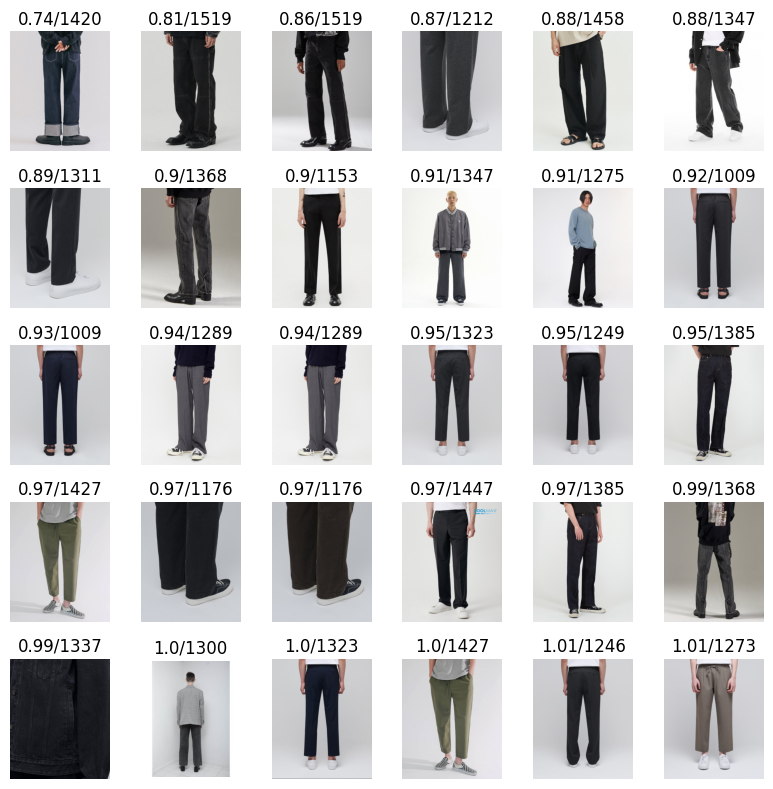

In [37]:
# 그냥 유사도
# img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") # 알고 싶 이미지 경로
# fe = FeatureExtractor()
# query_vgg19 = fe.extract(img)
# dists_vgg19 = np.linalg.norm(features_vgg19 - query, axis=1)


# fe_irv2 = FeatureExtractor_Irv2()
# query_irv2 = fe_irv2.extract(img)
# dists_irv2 = np.linalg.norm(features_irv2 - query_irv2, axis=1)

# Extract 30 images that have lowest distance # 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [ ]:
# 그냥 유사도
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") # 알고 싶 이미지 경로
fe_irv2 = FeatureExtractor_Irv2()
# Extract its features
query = fe_irv2.extract(img)

# Calculate the similarity (distance) between images # 유사도 비교 (L2 norm)
dists_irv2 = np.linalg.norm(features_irv2 - query, axis=1)

# Extract 30 images that have lowest distance # 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 286ms/step


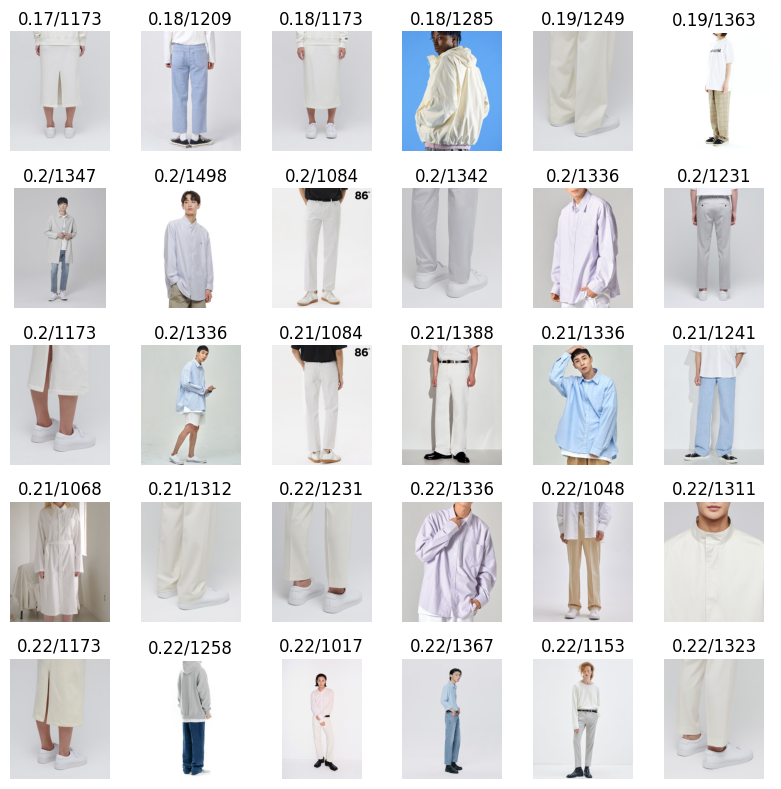

In [22]:
# 코사인 유사도
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances
import matplotlib.pyplot as plt

# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") # 알고 싶은 이미지 경로

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using cosine distance
dists = cosine_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 0s 291ms/step


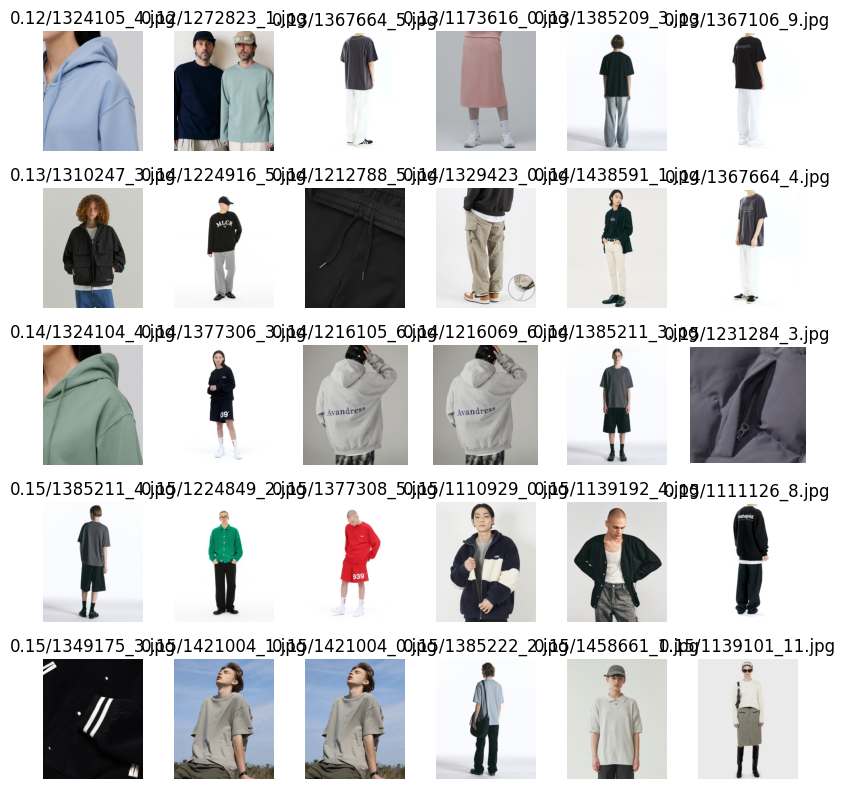

In [31]:
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances
import matplotlib.pyplot as plt

# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_3.jpg") # 알고 싶은 이미지 경로

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Euclidean distance
dists = euclidean_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 0s 292ms/step


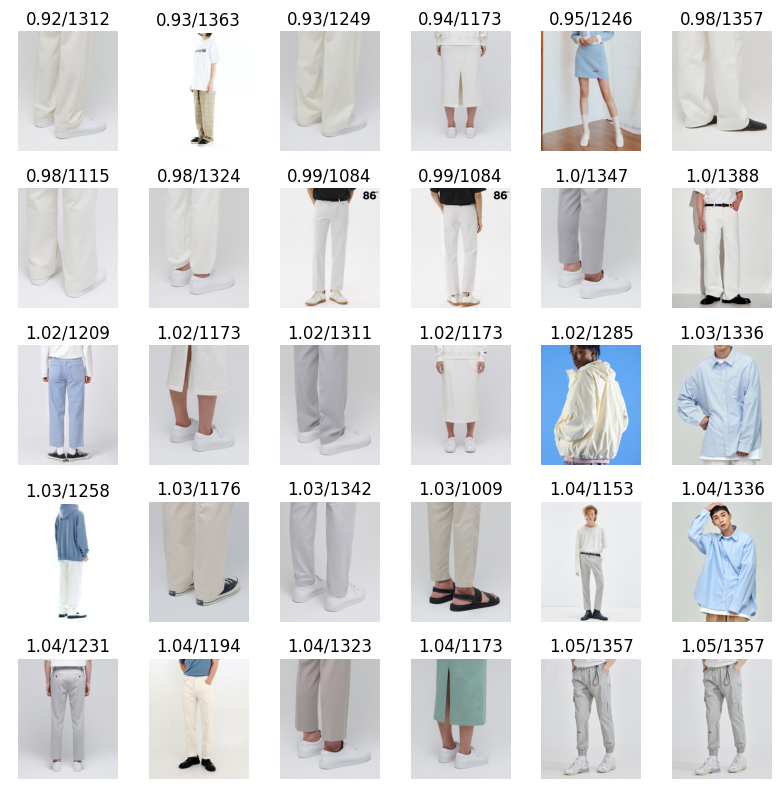

In [24]:
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt

# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") # 알고 싶은 이미지 경로

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Manhattan distance
dists = manhattan_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [28]:
query.shape

(1000,)